In [212]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures, OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
import os
%matplotlib inline

# Data Description
A detailed description of each column is given below.<br>
•	Suburb: The name of a residential area located within the greater Melbourne metropolitan area where the property is located. Melbourne is divided into many suburbs, each with its own distinct character and housing market.<br>
•	Address: The address of the property.<br>
•	Rooms: The number of rooms in the property. <br>
•	Type: The type of the property, such as house, townhouse, or unit.<br>
•	Price: The price of the property in Australian dollars.<br>
•	Method: The method used to sell the property, such as auction or private sale.<br>
•	SellerG: The name of the real estate agency or agent who sold the property.<br>
•	Date: The date the property was sold.<br>
•	Distance: The distance from the property to Melbourne CBD, in kilometers.<br>
•	Postcode: The postal code of the area where the property is located.<br>
•	Bedroom2: The number of bedrooms in the property (if available).<br>
•	Bathroom: The number of bathrooms in the property.<br>
•	Car: The number of car spaces or garages in the property.<br>
•	Landsize: The size of the land on which the property is built, in square meters.<br>
•	BuildingArea: The size of the building on the property, in square meters.<br>
•	YearBuilt: The year the property was built.<br>
•	CouncilArea: The name of the local government area in which the property is located.<br>
•	Latitude: The latitude of the property's location.<br>
•	Longitude: The longitude of the property's location.<br>
•	Regionname: The name of the region where the property is located.<br>
•	Propertycount: The number of properties that exist in the suburb.<br>


In [213]:
def wrangle():
    df=pd.read_csv('/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv')
    return df

In [214]:
df=wrangle()

In [215]:
# Set the max_columns option to None to display all columns
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame with all columns
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
3  4/02/2016       2.5    3067.0       3.0       2.0  1.0       0.0   
4  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN  Yarra City Council   -37.8014    144.9958   
1           NaN        NaN  Yarra City Council   -37.7996    144.9984   
2          79.0     1900.0  Yarra City Council   -37.8079    144.9934   
3           NaN        NaN  Yarra City Council   -37.8114    145.0116   
4         150.0     1900.0  Yarra City Council   -37.8093    144.9944   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [217]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [218]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [219]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

# Data Preprocessing and Feature Engineering

In [220]:
#Renaming the COlumn Longtitude to Longitude and Lattitude to Latitude
df.rename(columns={'Longtitude':'Longitude','Lattitude':'Latitude'},inplace=True)

In [221]:
#droping the column which have high missing value
df.drop(columns=["BuildingArea","YearBuilt"],inplace=True)

In [222]:
#removing all the missing value of target variable from our datasets
df.dropna(subset=['Price'],inplace=True)
df.shape

(27247, 19)

In [223]:
df.describe().T

count          mean            std          min          25%  \
Rooms          27247.0  2.992293e+00       0.954795      1.00000       2.0000   
Price          27247.0  1.050173e+06  641467.130105  85000.00000  635000.0000   
Distance       27246.0  1.128028e+01       6.787469      0.00000       6.4000   
Postcode       27246.0  3.113796e+03     111.139676   3000.00000    3046.0000   
Bedroom2       20806.0  3.046237e+00       0.955122      0.00000       2.0000   
Bathroom       20800.0  1.591683e+00       0.700880      0.00000       1.0000   
Car            20423.0  1.715370e+00       0.994216      0.00000       1.0000   
Landsize       17982.0  5.934889e+02    3757.266429      0.00000     219.0000   
Latitude       20993.0 -3.780696e+01       0.091619    -38.19043     -37.8609   
Longitude      20993.0  1.449967e+02       0.120680    144.42379     144.9253   
Propertycount  27244.0  7.566781e+03    4492.382418     83.00000    4294.0000   

                        50%           75%           max  
Rooms               3.00000  4.000000e+00  1.600000e+01  
Price          870000.00000  1.295000e+06  1.120000e+07  
Distance           10.50000  1.400000e+01  4.810000e+01  
Postcode         3088.00000  3.153000e+03  3.978000e+03  
Bedroom2            3.00000  4.000000e+00  2.000000e+01  
Bathroom            1.00000  2.000000e+00  9.000000e+00  
Car                 2.00000  2.000000e+00  1.800000e+01  
Landsize          512.00000  6.640000e+02  4.330140e+05  
Latitude          -37.80046 -3.774897e+01 -3.739780e+01  
Longitude         145.00320  1.450688e+02  1.455264e+02  
Propertycount    6567.00000  1.041200e+04  2.165000e+04

In [224]:
df.corr()

Rooms     Price  Distance  Postcode  Bedroom2  Bathroom  \
Rooms          1.000000  0.465238  0.284298  0.081328  0.958741  0.607968   
Price          0.465238  1.000000 -0.211384  0.044950  0.430275  0.429878   
Distance       0.284298 -0.211384  1.000000  0.489734  0.282813  0.140767   
Postcode       0.081328  0.044950  0.489734  1.000000  0.087748  0.123822   
Bedroom2       0.958741  0.430275  0.282813  0.087748  1.000000  0.605309   
Bathroom       0.607968  0.429878  0.140767  0.123822  0.605309  1.000000   
Car            0.394828  0.201803  0.244177  0.062870  0.396458  0.305628   
Landsize       0.034255  0.032748  0.055257  0.037747  0.034167  0.037578   
Latitude       0.020936 -0.215607 -0.089573 -0.218780  0.019087 -0.047392   
Longitude      0.087130  0.197874  0.188951  0.364808  0.090658  0.103547   
Propertycount -0.079572 -0.059017 -0.021705  0.023217 -0.059863 -0.040319   

                    Car  Landsize  Latitude  Longitude  Propertycount  
Rooms          0.394828  0.034255  0.020936   0.087130      -0.079572  
Price          0.201803  0.032748 -0.215607   0.197874      -0.059017  
Distance       0.244177  0.055257 -0.089573   0.188951      -0.021705  
Postcode       0.062870  0.037747 -0.218780   0.364808       0.023217  
Bedroom2       0.396458  0.034167  0.019087   0.090658      -0.059863  
Bathroom       0.305628  0.037578 -0.047392   0.103547      -0.040319  
Car            1.000000  0.031301  0.002003   0.039071      -0.013955  
Landsize       0.031301  1.000000  0.023689  -0.003633      -0.016988  
Latitude       0.002003  0.023689  1.000000  -0.347259       0.021271  
Longitude      0.039071 -0.003633 -0.347259   1.000000       0.028486  
Propertycount -0.013955 -0.016988  0.021271   0.028486       1.000000

<Axes: >

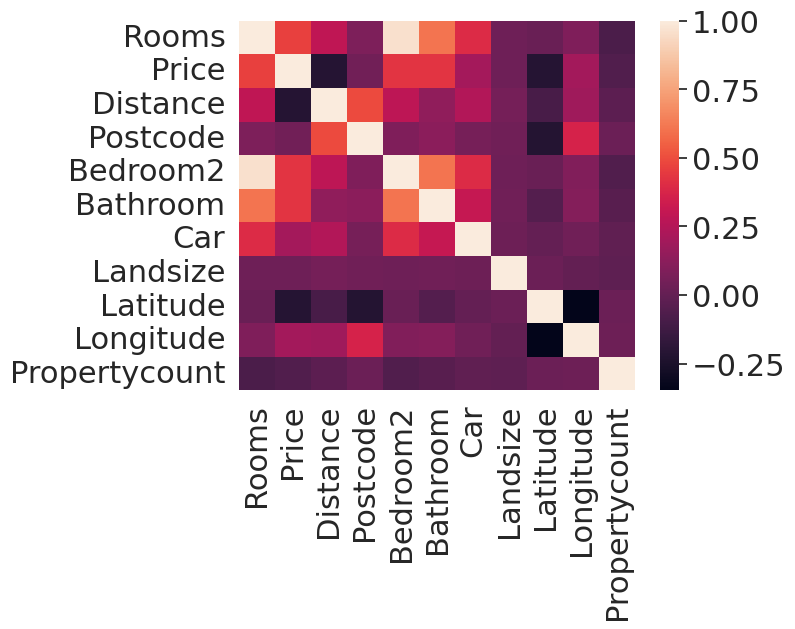

In [225]:
sns.heatmap(df.corr())

#### Droping the feature which has moderate correlation with Price. Thats means,the feature which is highlighted with orangle color in above heatmap

In [226]:
df.drop(columns=["Rooms","Bedroom2","Bathroom","Car"],inplace=True)

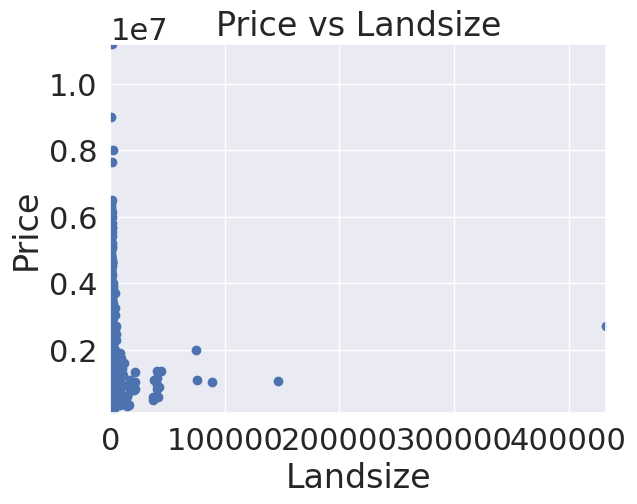

In [227]:
#scatterplot 
plt.scatter(x=df.Landsize,y=df.Price);
plt.ylim(df.Price.min(),df.Price.max())
plt.xlim(df.Landsize.min(),df.Landsize.max())

#labeling the axis
plt.xlabel("Landsize")
plt.ylabel("Price")

#set the title
plt.title("Price vs Landsize");

In the above scatterplot, we cannot see any relationship between landsize and Price. This might be possible due to outliers. You can see in the figure, there are some landsize that are too far from the normal size. SO lets drop the possible outliers and again try to see their relation

#### Droping outliers 

In [228]:
low,high = df.Landsize.quantile([0.1,0.9])
mask_area = df.Landsize.between(low,high)
df = df[mask_area]

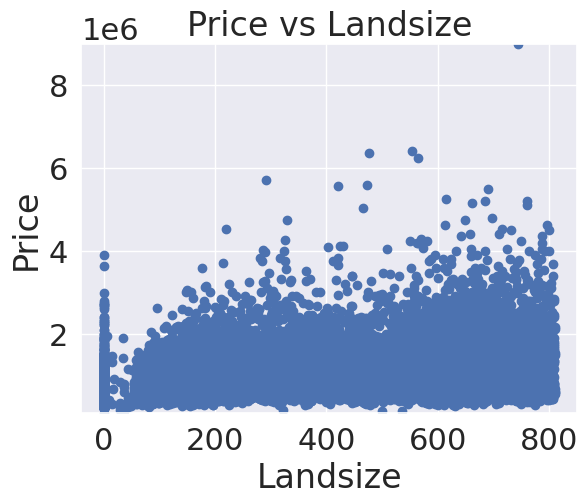

In [229]:
#scatterplot after droping outliers
plt.scatter(x=df.Landsize,y=df.Price);
plt.ylim(df.Price.min(),df.Price.max())
# plt.xlim(df.Landsize.min(),df.Landsize.max())

#labeling the axis
plt.xlabel("Landsize")
plt.ylabel("Price")

#set the title
plt.title("Price vs Landsize");

You can see above,All the null/nan data from the target column has been removed. Now it will not create much problem for training and testing the model. However, we still have much missing values for the feature for Landsize

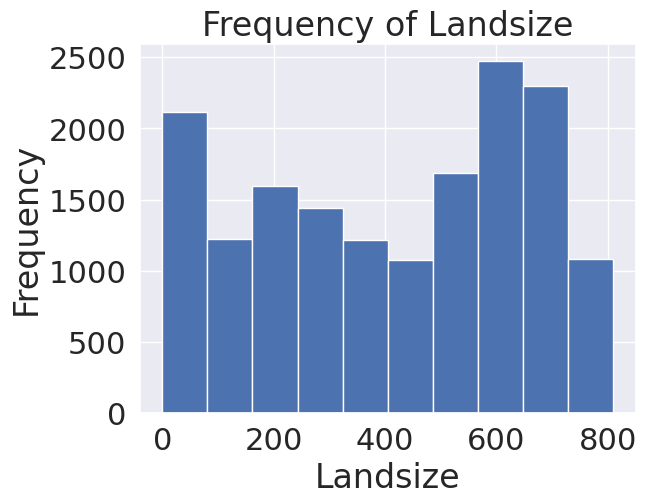

In [230]:
#Histogram of the frequency of Landsize
plt.hist(x=df.Landsize);

#labeling the axis
plt.xlabel("Landsize")
plt.ylabel("Frequency")

#set the title
plt.title("Frequency of Landsize");

### Analysing Council Area
In some countries, such as Australia and Scotland, council areas are the local government administrative areas that are responsible for providing services to residents, such as waste management, local planning, and community services. Council areas can encompass multiple suburbs or neighborhoods within a larger city or town.

In the context of house price prediction, the council area can be an important predictor variable because it can influence the desirability and value of a property. Factors such as the quality of local schools, access to transportation, and the availability of community amenities can all be influenced by the council area in which a property is located.

In [231]:
print(df["CouncilArea"].dtypes)
print(df.CouncilArea.nunique())
df.CouncilArea.unique()

object
33


array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Whittlesea City Council', 'Frankston City Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Macedon Ranges Shire Council', 'Cardinia Shire Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)

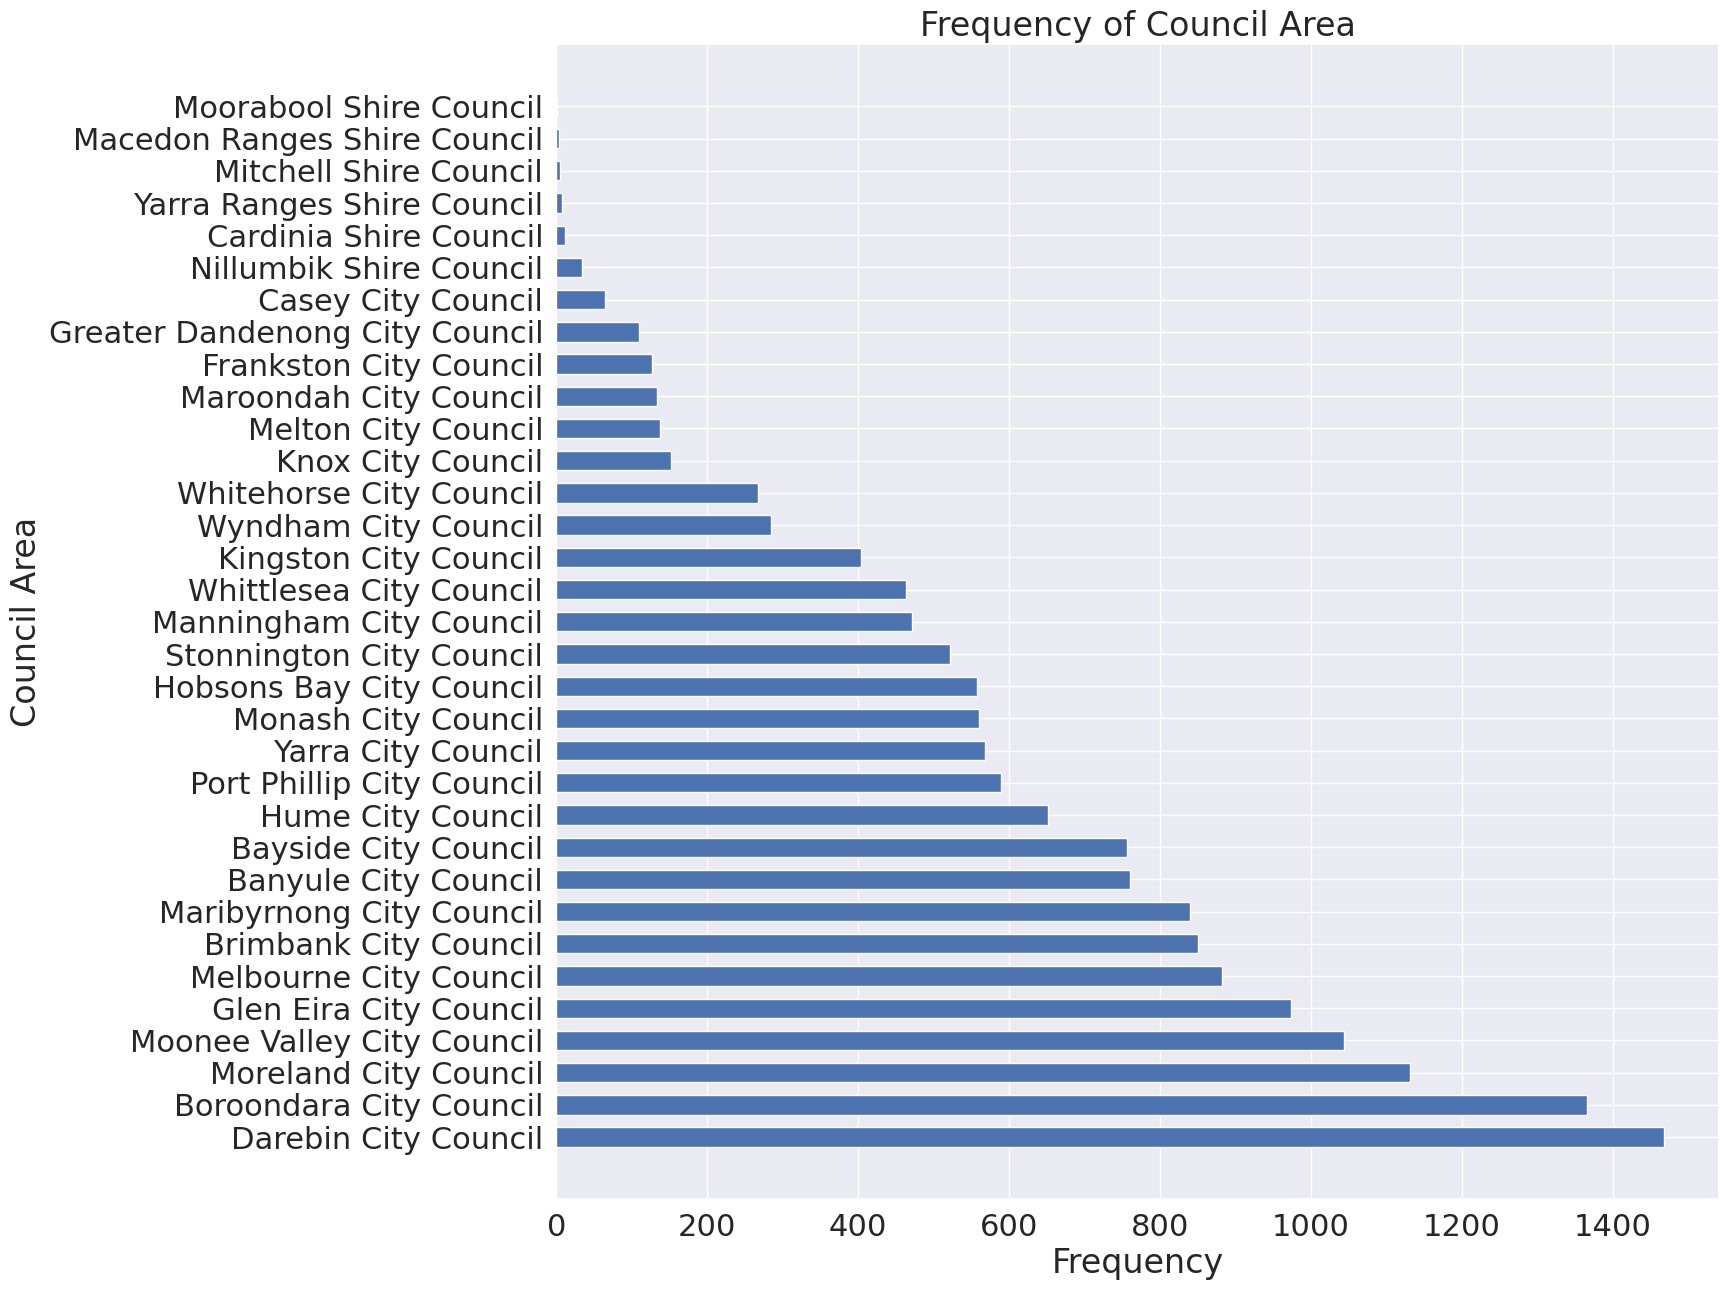

In [237]:
# Count the number of occurrences of each unique value in the "CouncilArea" column
counts = df["CouncilArea"].value_counts()

# Create a horizontal bar chart with increased gap between the bars
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(counts.index, counts.values, height=0.6)
ax.set_xlabel("Frequency")
ax.set_ylabel("Council Area")
ax.set_title("Frequency of Council Area")
plt.show()

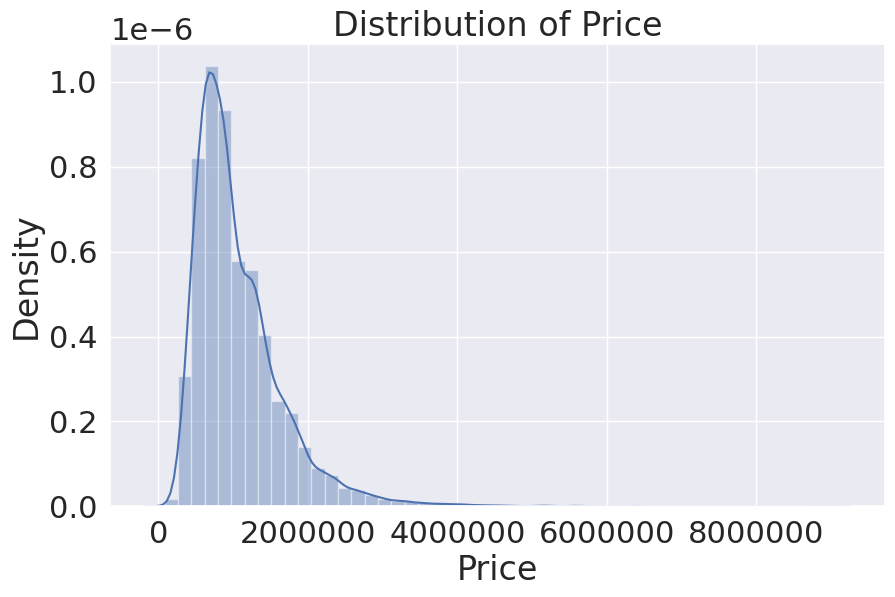

In [117]:
#Price distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df['Price'],hist = True, kde =True)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Distribution of Price")
plt.show()

From above kernal density estimation, we found that Price is left skewed. Thus, mode > median > mean" means that the distribution of the Price variable is skewed towards the lower values, with more properties having lower prices than higher prices. In a left-skewed distribution, the mode (the most frequent value) is typically the highest value, the median (the middle value) is greater than the mean (the average value), and the mean is typically the lowest value. This suggests that the lower prices have a greater impact on the mean than the higher prices. Understanding this distribution of a variable, we will be grouping the information by different categorical features

In [118]:
priceByCA = df.groupby('CouncilArea')['Price'].median().reset_index(name='Price_median')
priceByCA.sort_values(by="Price_median",ascending=False)[:10] #view Top 10 Council Area with highest price

CouncilArea  Price_median
2      Boroondara City Council     1650000.0
1         Bayside City Council     1501000.0
27    Stonnington City Council     1350000.0
15     Manningham City Council     1202000.0
21         Monash City Council     1170500.0
8       Glen Eira City Council     1160000.0
31          Yarra City Council     1147500.0
26   Port Phillip City Council     1122000.0
28     Whitehorse City Council     1100000.0
22  Moonee Valley City Council      991000.0

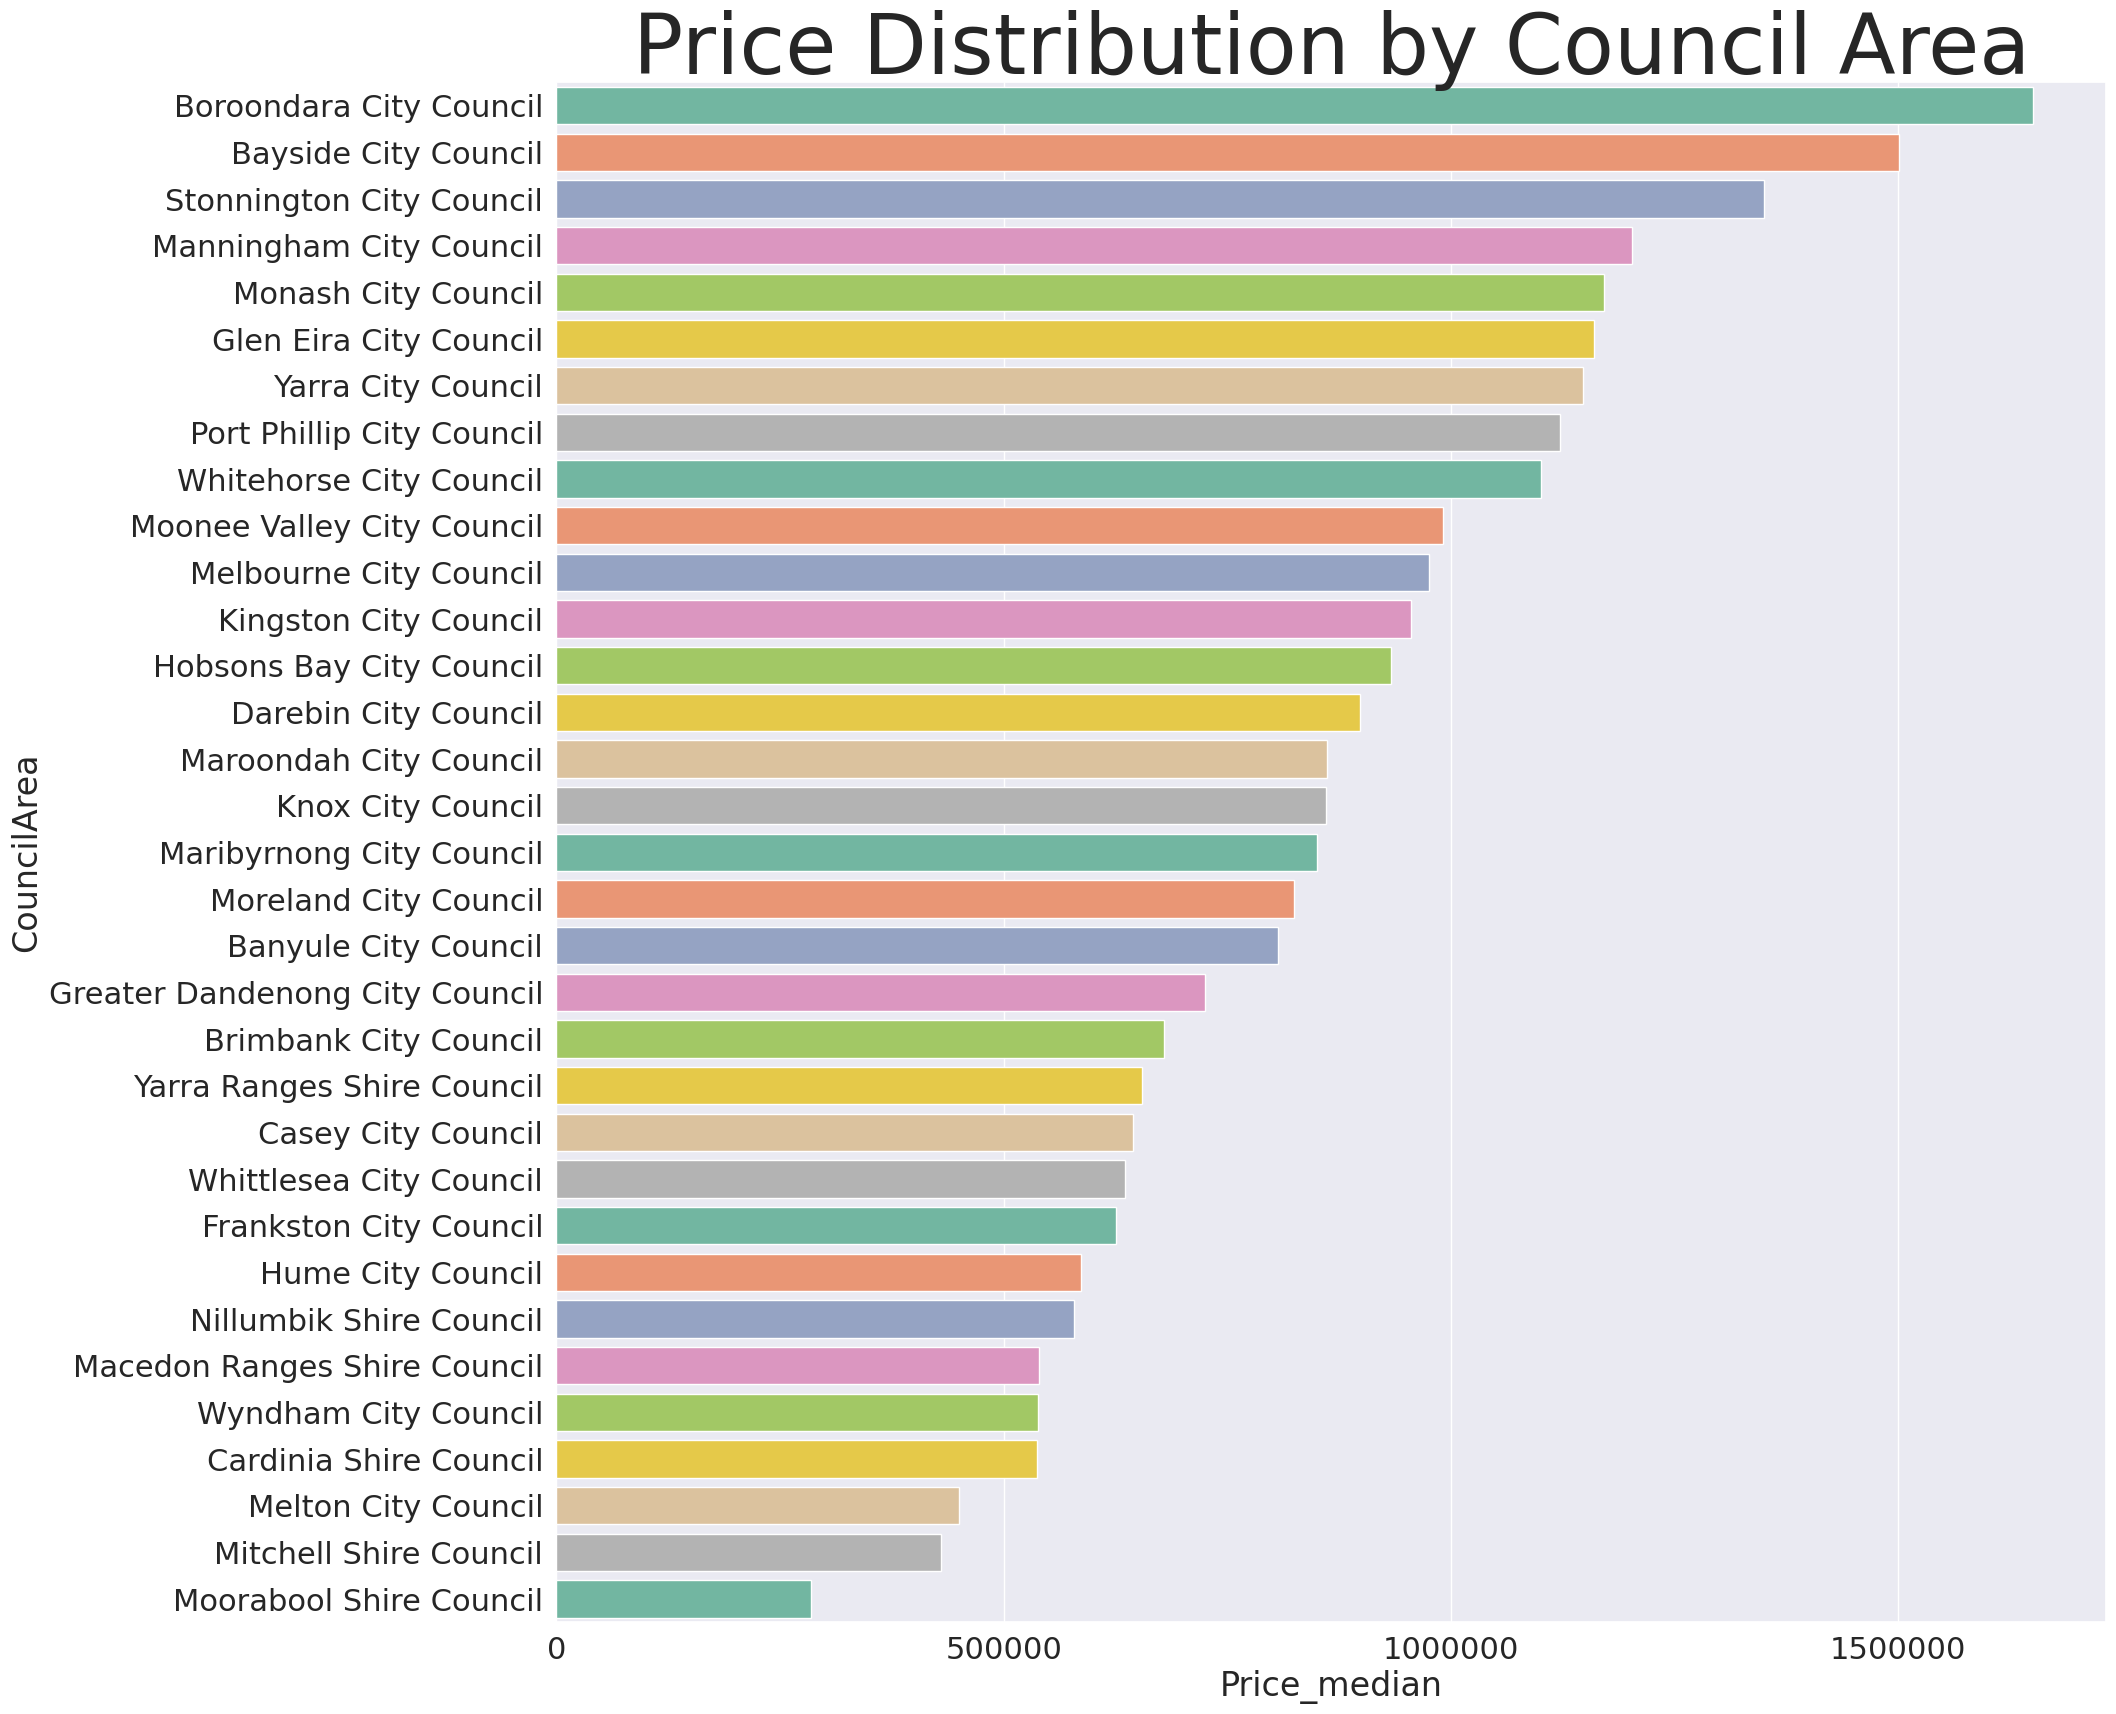

In [119]:
#lets visualize the median price for each city
priceByCA = priceByCA.sort_values(by="Price_median",ascending=False)
fig, ax = plt.subplots(figsize=(20, 20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
sns.set(font_scale = 5)
sns.barplot(data=priceByCA, x = 'Price_median',y = 'CouncilArea',palette=sns.color_palette('Set2',50))
plt.title("Price Distribution by Council Area")
plt.show()

### Analysing Price by Region

In [120]:
priceByRegion = df.groupby('Regionname')['Price'].median().reset_index(name='Price_median')
priceByRegion.sort_values(by="Price_median",ascending=False)

Regionname  Price_median
5       Southern Metropolitan     1316000.0
0        Eastern Metropolitan     1030000.0
4  South-Eastern Metropolitan      840000.0
2       Northern Metropolitan      801000.0
6        Western Metropolitan      790000.0
1            Eastern Victoria      608500.0
3           Northern Victoria      518000.0
7            Western Victoria      412250.0

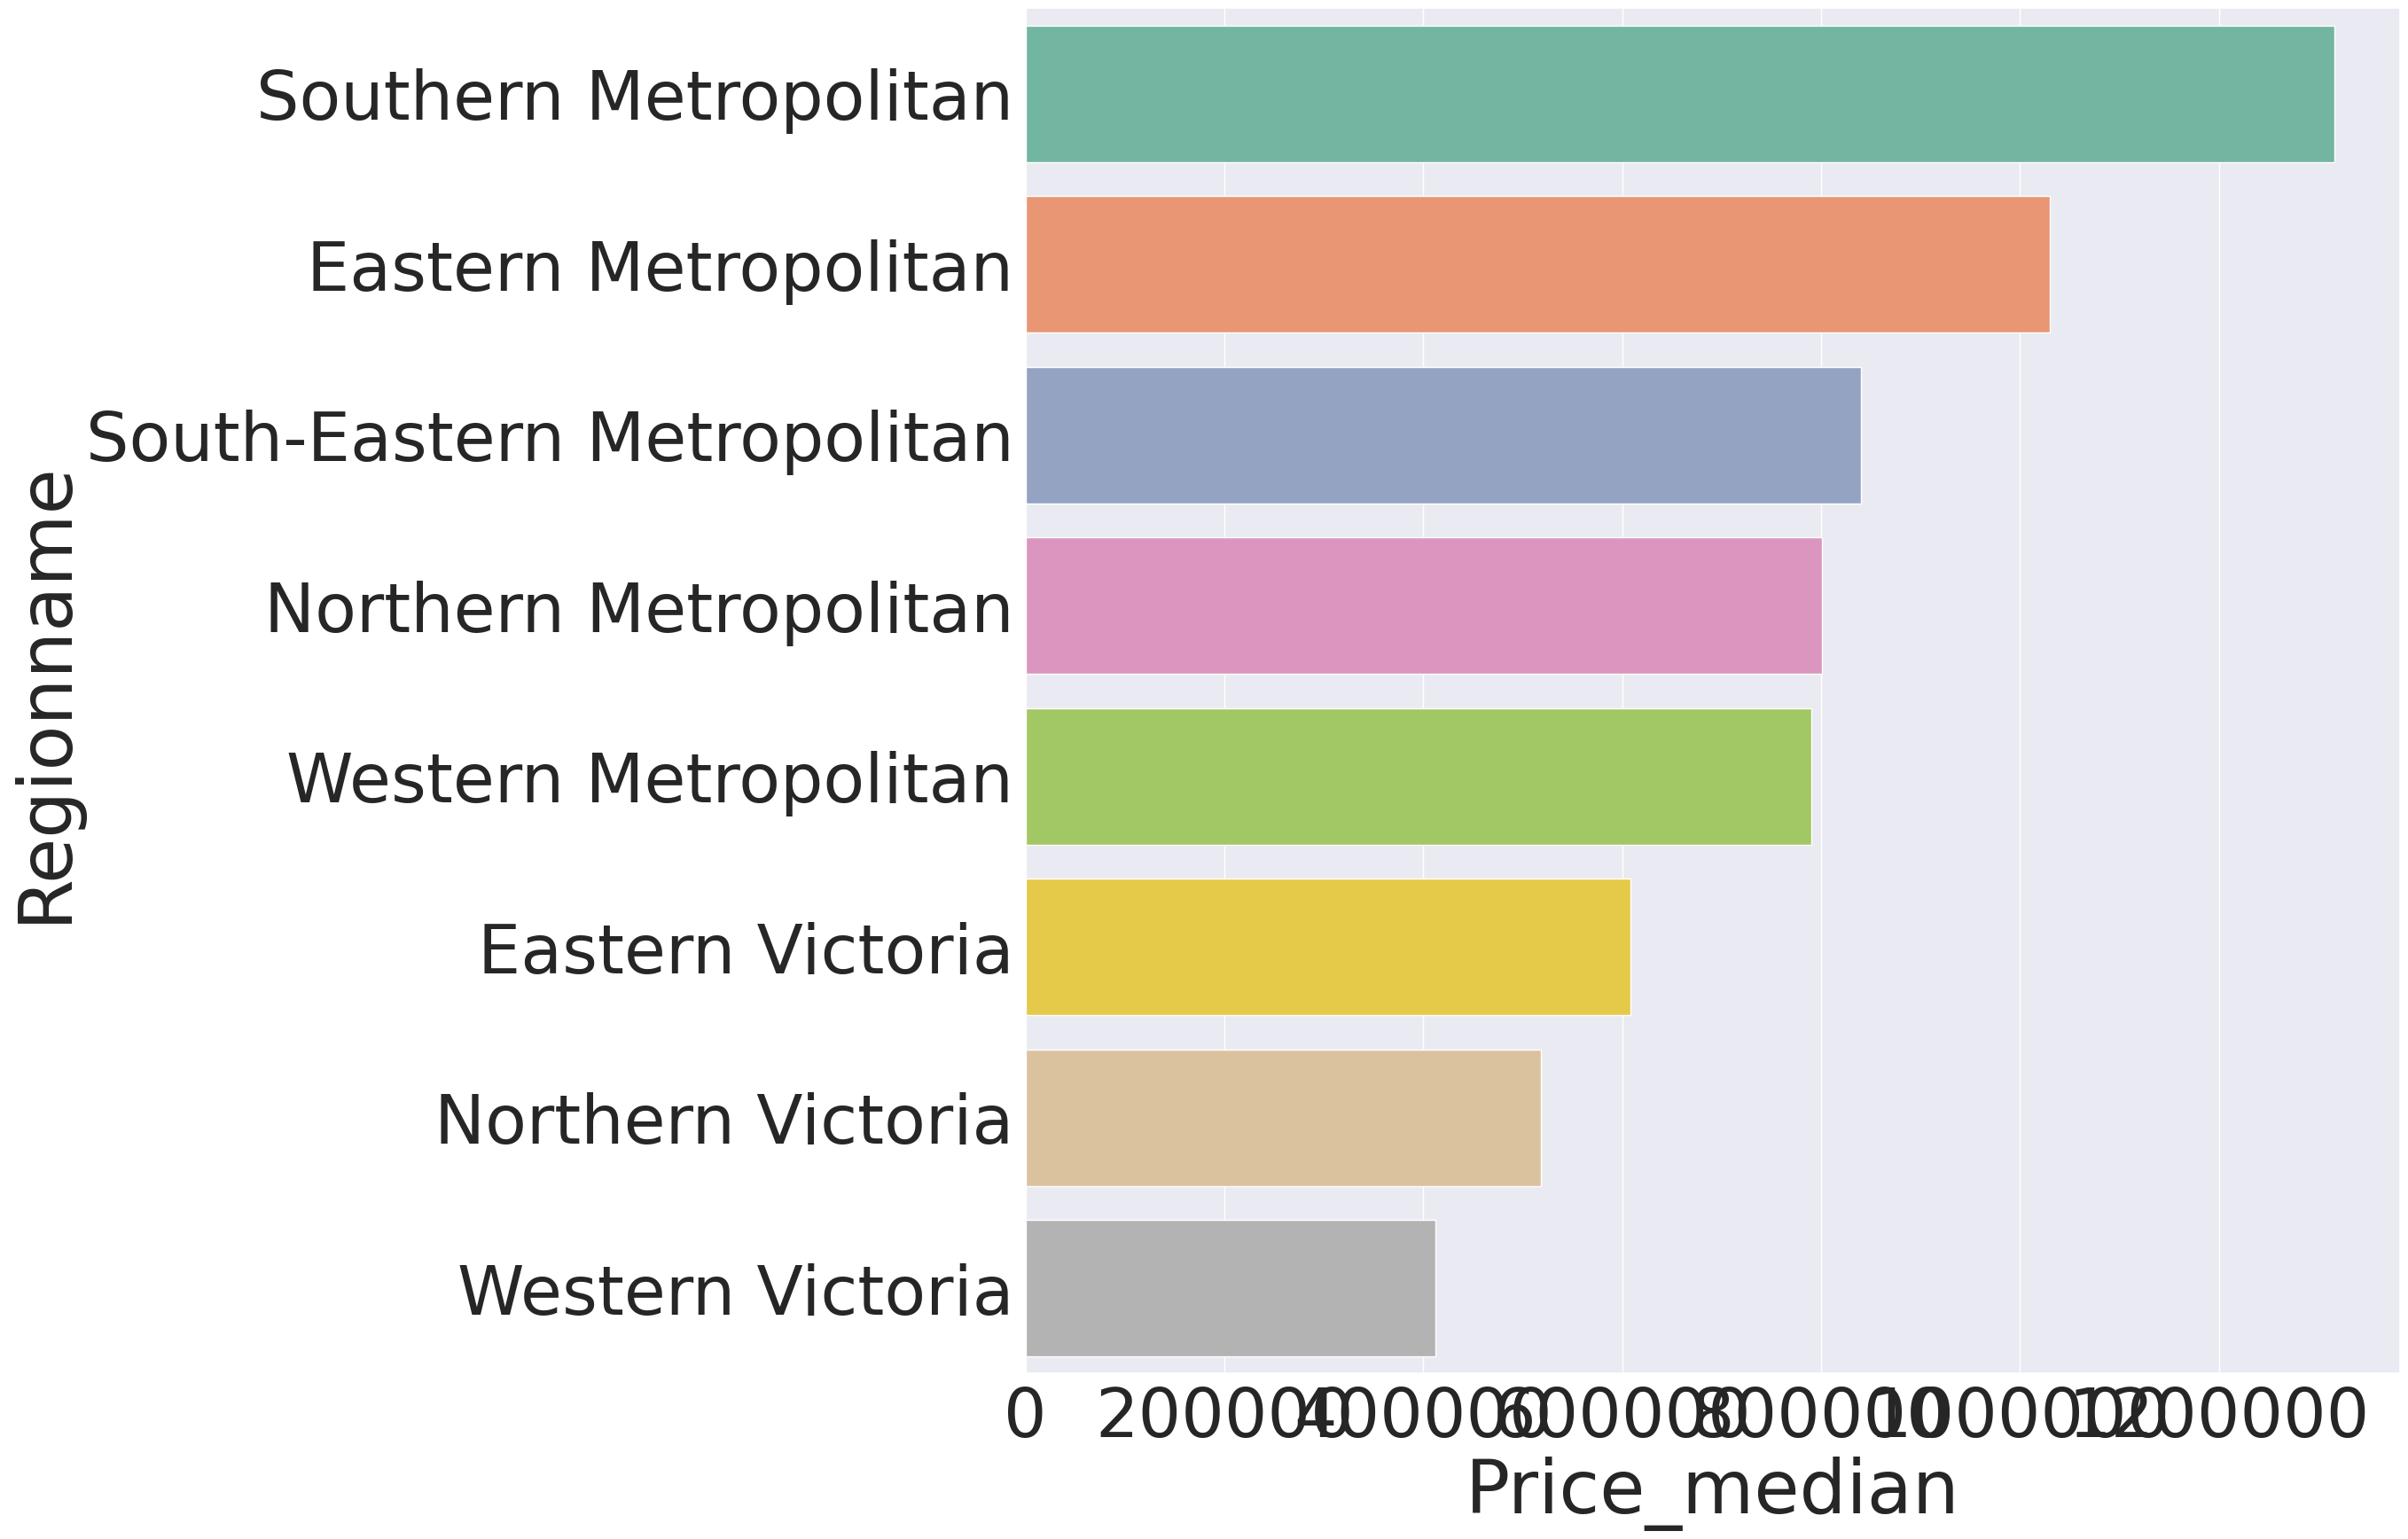

In [121]:
#lets visualize the median price for each city
priceByRegion = priceByRegion.sort_values(by="Price_median",ascending=False)
fig, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
sns.set(font_scale =2)
sns.barplot(data=priceByRegion, x = 'Price_median',y = 'Regionname',palette=sns.color_palette('Set2',50))
plt.show()

SO from above, it shows that it is very severe to drop all the missing values beacause our data will shrink below by 4 times (34,000+ data shrinks down to around 9000)

In [122]:
df.groupby(["Regionname","CouncilArea"])["Price"].median().sort_values(ascending=False)

Regionname                  CouncilArea                   
Southern Metropolitan       Boroondara City Council           1650000.0
Eastern Metropolitan        Boroondara City Council           1513000.0
Southern Metropolitan       Bayside City Council              1501000.0
                            Stonnington City Council          1350000.0
Eastern Metropolitan        Monash City Council               1340000.0
                            Manningham City Council           1202000.0
Southern Metropolitan       Glen Eira City Council            1160000.0
                            Monash City Council               1150000.0
Northern Metropolitan       Yarra City Council                1147500.0
Southern Metropolitan       Port Phillip City Council         1122000.0
Eastern Metropolitan        Whitehorse City Council           1100000.0
Southern Metropolitan       Melbourne City Council            1030000.0
South-Eastern Metropolitan  Monash City Council               1025000.0
South

In conclusion, based on the data aggregation performed, it was observed that cities located in the Southern Metropolitan and Eastern Metropolitan areas tend to have higher property values. However, it's important to note that this correlation may be influenced by the size of the land area. To gain a clearer understanding, the next step involves visualizing the impact of land area on property prices in various cities and regions by analyzing the price per square meter.

### Analyse price of Both Council Area and Region by meter^2 

In [123]:
df["price_per_m2"] = df["Price"]/df["Landsize"]

In [124]:
#price per meter sq. by council Area
pricePerM2_byCA = df.groupby('CouncilArea')['price_per_m2'].median().reset_index(name='price_per_m2')
pricePerM2_byCA.sort_values(by="price_per_m2",ascending=False)[:10]

CouncilArea  price_per_m2
18      Melbourne City Council  13022.250027
26   Port Phillip City Council  12086.092715
31          Yarra City Council   8752.834467
27    Stonnington City Council   7479.630136
2      Boroondara City Council   4072.914585
1         Bayside City Council   3595.180723
16    Maribyrnong City Council   3214.285714
8       Glen Eira City Council   3041.269841
24       Moreland City Council   2903.225806
22  Moonee Valley City Council   2861.538462

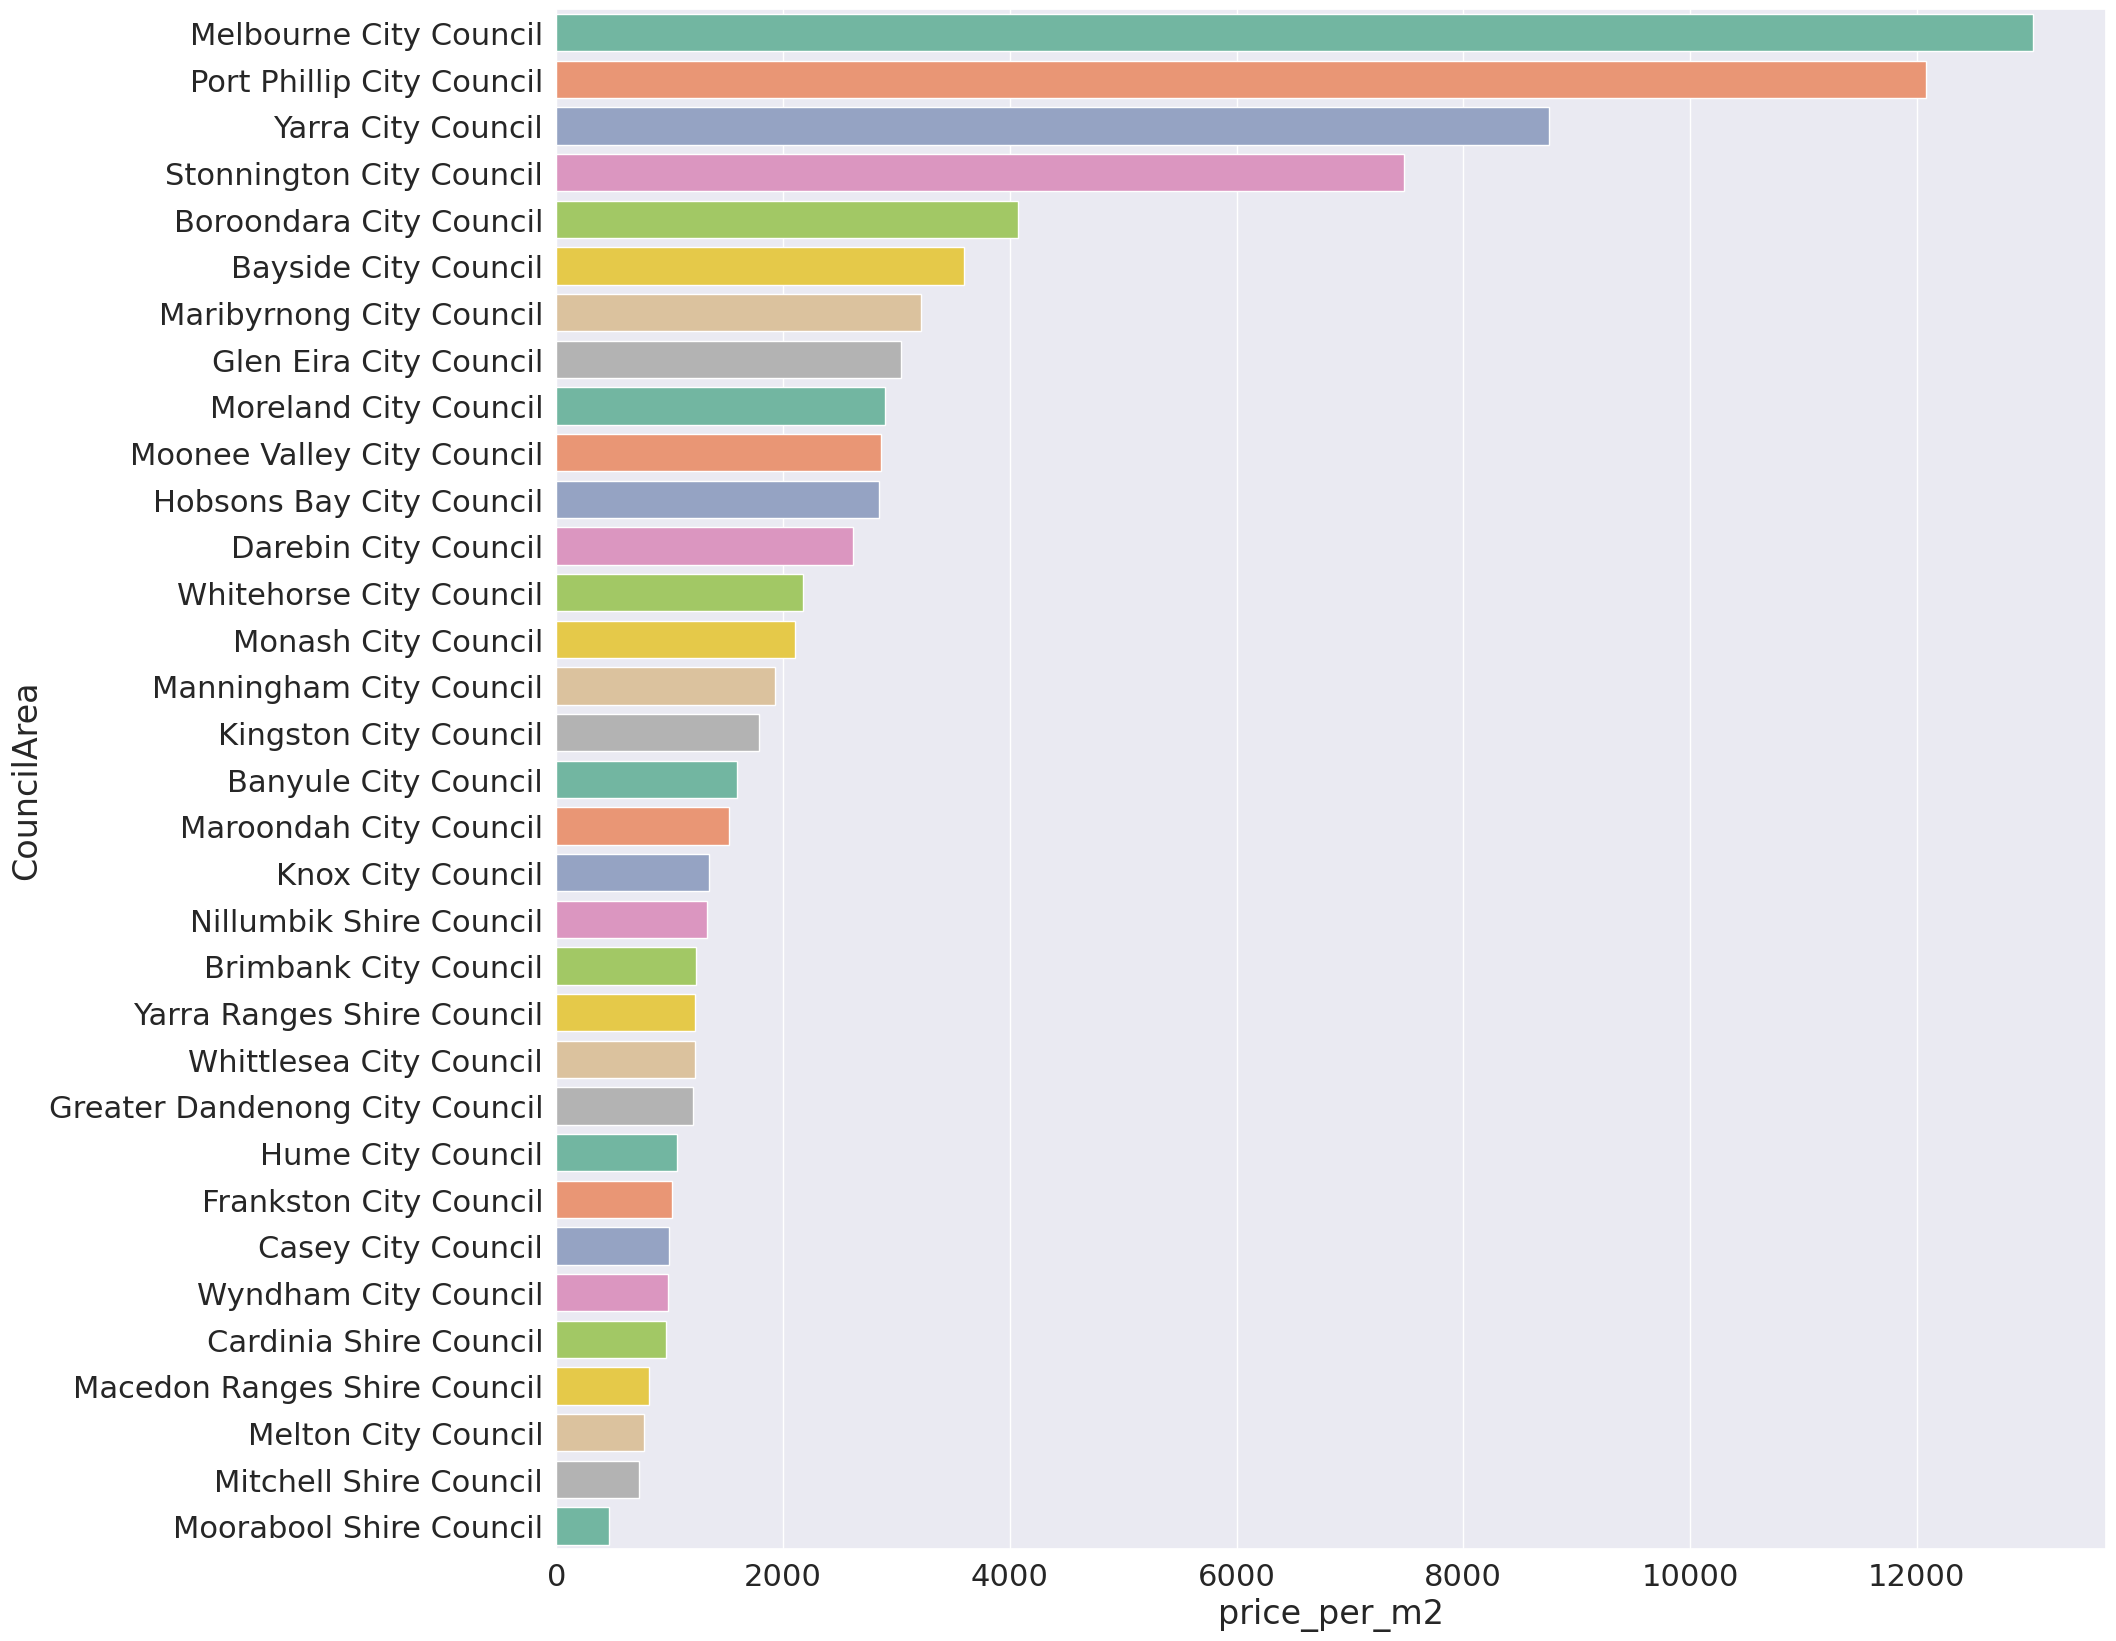

In [125]:
pricePerM2_byCA = pricePerM2_byCA.sort_values(by="price_per_m2",ascending=False)
fig, ax = plt.subplots(figsize=(20, 20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
sns.set(font_scale = 2)
sns.barplot(data=pricePerM2_byCA, x = 'price_per_m2',y = 'CouncilArea',palette=sns.color_palette('Set2',50))
plt.show()

Our suspection came true, because of large area given in some feature, it was affecting the price with high amount. As we see by visualizing the price per m2, we can see the huge different. Similarly, we are also going to do same thing for each region.

In [126]:
#price per meter sq. by Region
pricePerM2_byRegionname = df.groupby('Regionname')['price_per_m2'].median().reset_index(name='price_per_m2')
pricePerM2_byRegionname.sort_values(by="price_per_m2",ascending=False)[:10]

#Note we are grouping by median instead of mean because price is left-skewed

Regionname  price_per_m2
5       Southern Metropolitan   4341.984990
2       Northern Metropolitan   2594.339623
6        Western Metropolitan   2115.484119
0        Eastern Metropolitan   1889.846743
4  South-Eastern Metropolitan   1483.807662
1            Eastern Victoria   1019.402985
3           Northern Victoria    971.316819
7            Western Victoria    673.701299

Southern Metroplitan region is still on the top, however we can see other region like Northern & western metropolitan coming upward than Estern Metropoliton

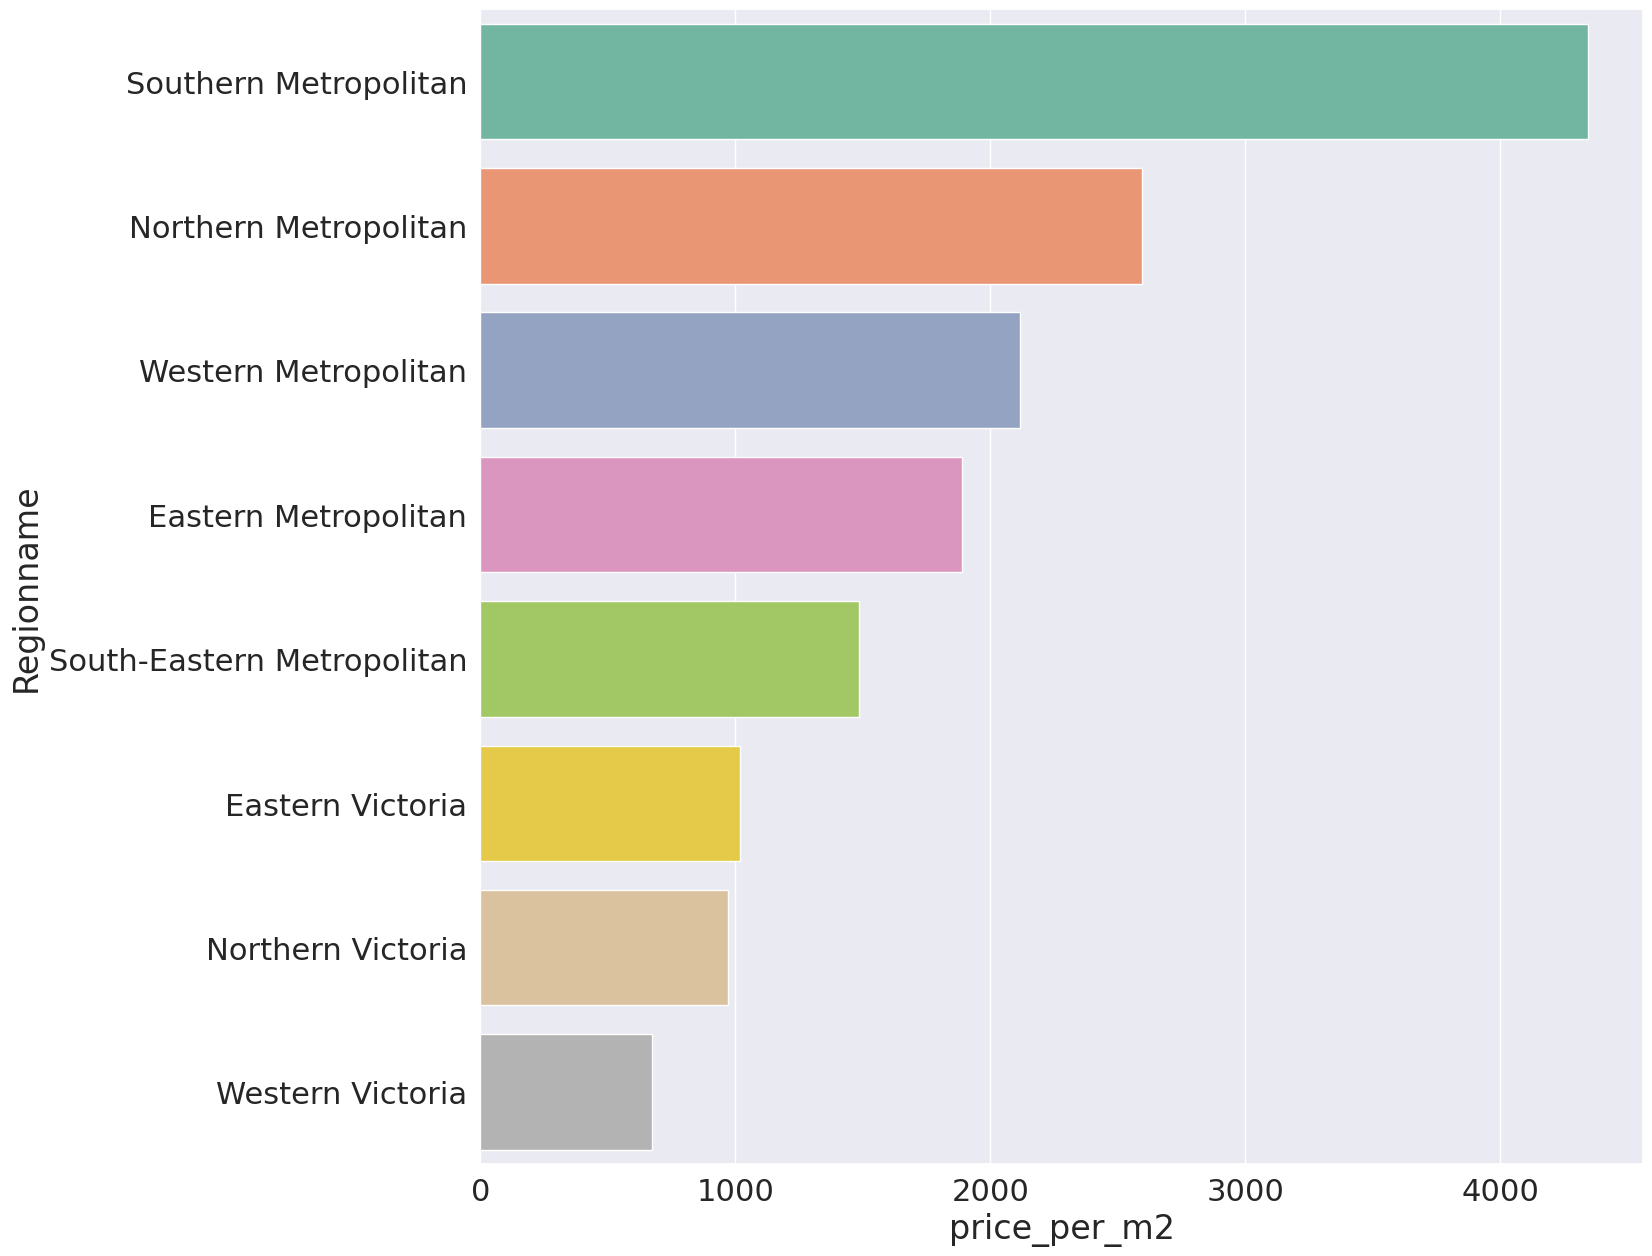

In [127]:
#visualizing price per meter squater by region
pricePerM2_byRegionname = pricePerM2_byRegionname.sort_values(by="price_per_m2",ascending=False)
fig, ax = plt.subplots(figsize=(15, 15))
ax.get_xaxis().get_major_formatter().set_scientific(False)
sns.set(font_scale = 2)
sns.barplot(data=pricePerM2_byRegionname, x = 'price_per_m2',y = 'Regionname',palette=sns.color_palette('Set2',50))
plt.show()

## Grouping price per meter^2 for associated region and city

In [128]:
df.groupby(["Regionname","CouncilArea"])["price_per_m2"].mean().sort_values(ascending=False)
#Note we are grouping by mean instead of meadian to understand the baseline

Regionname                  CouncilArea                   
Eastern Victoria            Manningham City Council                   inf
South-Eastern Metropolitan  Monash City Council               1904.234331
Eastern Metropolitan        Knox City Council                 1570.821214
Northern Victoria           Nillumbik Shire Council           1415.016724
South-Eastern Metropolitan  Knox City Council                 1409.416473
Northern Metropolitan       Whittlesea City Council           1355.072406
South-Eastern Metropolitan  Greater Dandenong City Council    1336.693011
Eastern Victoria            Yarra Ranges Shire Council        1274.273173
Eastern Metropolitan        Nillumbik Shire Council           1272.229822
Eastern Victoria            Casey City Council                1134.288823
Western Metropolitan        Wyndham City Council              1119.634075
Eastern Victoria            Frankston City Council            1054.904922
South-Eastern Metropolitan  Casey City Council       

In conclusion, based on the provided summary information, the Knox City Council in the Eastern Metropolitan region boasts the highest average price per square meter. However, the South-Eastern Metropolitan region stands out with the majority of properties listed in the top average price category. This suggests that while Knox City Council may have higher individual property prices, the South-Eastern Metropolitan region has a greater concentration of high-value properties, making it an appealing destination for premium real estate investments and affluent homebuyers.

In [129]:
print(df.isna().sum())
print(df.shape)

Suburb            0
Address           0
Type              0
Price             0
Method            0
SellerG           0
Date              0
Distance          0
Postcode          0
Landsize          0
CouncilArea       0
Latitude         20
Longitude        20
Regionname        0
Propertycount     0
price_per_m2      0
dtype: int64
(16190, 16)


It  seems a lat & long column still has 20 missing values, lets clean them

In [130]:
df.dropna(subset=["Latitude"],inplace=True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16170 entries, 1 to 34856
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         16170 non-null  object 
 1   Address        16170 non-null  object 
 2   Type           16170 non-null  object 
 3   Price          16170 non-null  float64
 4   Method         16170 non-null  object 
 5   SellerG        16170 non-null  object 
 6   Date           16170 non-null  object 
 7   Distance       16170 non-null  float64
 8   Postcode       16170 non-null  float64
 9   Landsize       16170 non-null  float64
 10  CouncilArea    16170 non-null  object 
 11  Latitude       16170 non-null  float64
 12  Longitude      16170 non-null  float64
 13  Regionname     16170 non-null  object 
 14  Propertycount  16170 non-null  float64
 15  price_per_m2   16170 non-null  float64
dtypes: float64(8), object(8)
memory usage: 2.1+ MB


In [132]:
df.head()

Suburb           Address Type      Price Method SellerG       Date  \
1  Abbotsford      85 Turner St    h  1480000.0      S  Biggin  3/12/2016   
2  Abbotsford   25 Bloomburg St    h  1035000.0      S  Biggin  4/02/2016   
4  Abbotsford      5 Charles St    h  1465000.0     SP  Biggin  4/03/2017   
5  Abbotsford  40 Federation La    h   850000.0     PI  Biggin  4/03/2017   
6  Abbotsford       55a Park St    h  1600000.0     VB  Nelson  4/06/2016   

   Distance  Postcode  Landsize         CouncilArea  Latitude  Longitude  \
1       2.5    3067.0     202.0  Yarra City Council  -37.7996   144.9984   
2       2.5    3067.0     156.0  Yarra City Council  -37.8079   144.9934   
4       2.5    3067.0     134.0  Yarra City Council  -37.8093   144.9944   
5       2.5    3067.0      94.0  Yarra City Council  -37.7969   144.9969   
6       2.5    3067.0     120.0  Yarra City Council  -37.8072   144.9941   

              Regionname  Propertycount  price_per_m2  
1  Northern Metropolitan         4019.0   7326.732673  
2  Northern Metropolitan         4019.0   6634.615385  
4  Northern Metropolitan         4019.0  10932.835821  
5  Northern Metropolitan         4019.0   9042.553191  
6  Northern Metropolitan         4019.0  13333.333333

# Analyse Price by Geolocation

In [133]:
# Plot Mapbox location and price
fig = px.scatter_mapbox(
    df,  
    lat="Latitude",
    lon="Longitude",
    width=800,  # Width of map
    height=800,  # Height of map
    color="Price",
    hover_data=["Price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")


fig.show()

In the code that I have created above, I used Mapbox to create a scatter plot that visualizes the location and price of data points in a dataset. The scatter plot uses dots to represent each data point, which are placed on a map to show the geographic location of each data point. The color of each dot represents the price of that data point, with higher prices shown in one color and lower prices shown in another color. This allows us to quickly identify areas where prices are higher or lower, and to see how prices vary across different locations. By creating this scatter plot, we have created a powerful visualization that can help us to better understand the patterns and trends in our data, and to communicate those insights to others.
* It seems like house at the center have slightly high price

In [134]:
# print the minimum and maximum values of the 'price_per_m2' column
# print(df.price_per_m2.min(), df.price_per_m2.max())

# filter out infinite values
df_filtered = df[np.isinf(df['price_per_m2']) == False]

# print the minimum and maximum values of the filtered 'price_per_m2' column
# print(df_filtered.price_per_m2.min(), df_filtered.price_per_m2.max())
print(df_filtered.price_per_m2.sort_values(ascending=False)[:50])
# print(df_filtered.price_per_m2.sort_values(ascending=True)[:100])
# check for infinite values in the filtered DataFrame
print((np.isinf(df_filtered['price_per_m2'])==True).sum())


5489     710000.000000
14180    440000.000000
18207    391000.000000
17436    380000.000000
12567    301500.000000
22700     97533.333333
13663     88000.000000
17904     54285.714286
13722     50111.111111
14205     41352.941176
18727     40150.000000
17817     39411.764706
24272     28965.517241
31744     27631.578947
3417      26744.186047
25944     25737.704918
2902      24404.761905
8755      23706.896552
15630     23233.333333
9867      22500.000000
7616      22400.000000
17754     21234.567901
32511     21086.956522
15845     21081.081081
17240     20877.192982
21490     20833.333333
11172     20568.181818
166       20476.190476
24153     20338.983051
33739     20333.333333
5293      20227.272727
8913      20090.909091
149       20000.000000
8935      20000.000000
23378     19959.349593
32849     19819.819820
12618     19777.777778
16758     19758.064516
30186     19724.770642
9264      19520.547945
11200     19453.125000
7231      19402.985075
26728     19230.769231
19131     1

In [135]:
#droping outliers
df_filtered = df_filtered[df_filtered['price_per_m2']<29000]

In [136]:
# Plot Mapbox location and price per m2
fig = px.scatter_mapbox(
    df_filtered,  
    lat="Latitude",
    lon="Longitude",
    width=800,  # Width of map
    height=800,  # Height of map
    color="price_per_m2",
    hover_data=["price_per_m2"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")
# fig.update_traces(marker=dict(size=10, color=df_filtered['price_per_m2'], colorbar=dict(thickness=20), colorscale='Viridis'))
fig.show()

Conclusion: From the above map view of price_perm2, we can summarize that it gives similar to the actual price view by geolocation. And Thus the price of house are expensive which are round the South Melbourne,Port Melbourne, West Melbourne, Parkivile,near the sea area and upper to the Caltron

### Creating a time Series plot

In [137]:
df['Date'].dtype

dtype('O')

In [138]:
#converting object type to datetime 
df.Date = pd.to_datetime(df.Date)

In [139]:
#Change in median price per square meter
Price_changed_median = df.groupby('Date')['price_per_m2'].median().reset_index(name='median_price_per_m2')

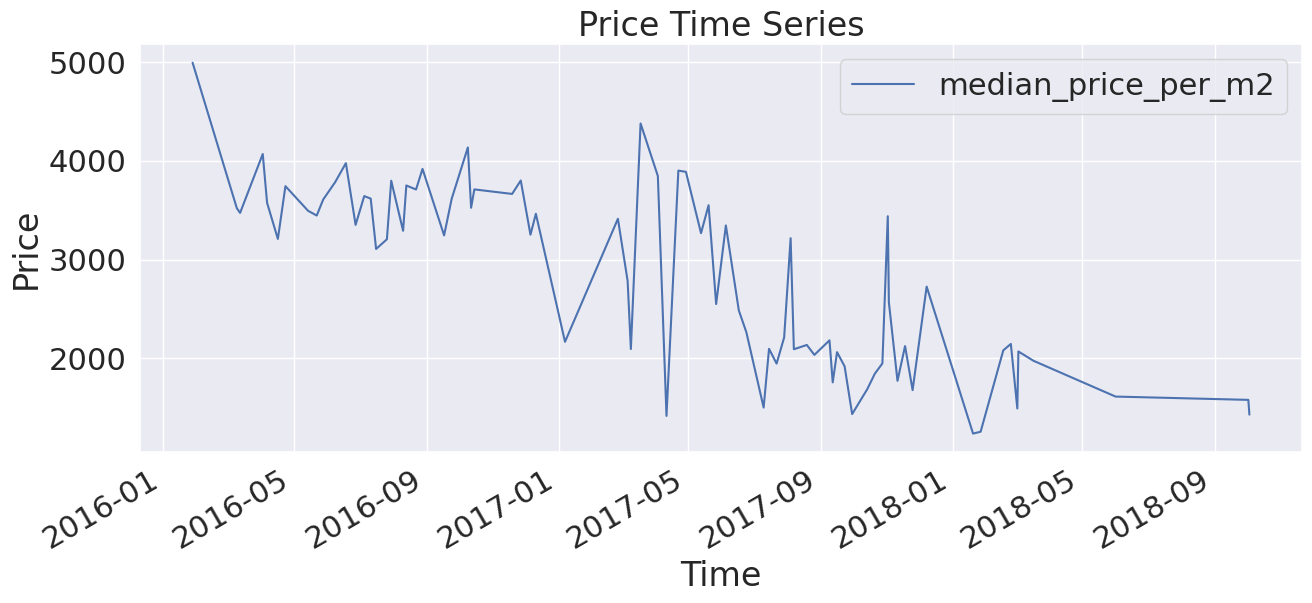

In [140]:
#Visualizing median price changes over time
fig, ax = plt.subplots(figsize=(15, 6))
Price_changed_median.plot(
    x='Date',
    y='median_price_per_m2',
    xlabel="Time",
    ylabel="Price",
    title="Price Time Series",
    ax=ax)
plt.show();

During the year of 2016, the price was going with the average of 3500. In 2017, we can see the uncertain downfall as well as plumping up extremely high in the same year. However, By the starting of 2018 it starts to downfall with record low

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16170 entries, 1 to 34856
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         16170 non-null  object        
 1   Address        16170 non-null  object        
 2   Type           16170 non-null  object        
 3   Price          16170 non-null  float64       
 4   Method         16170 non-null  object        
 5   SellerG        16170 non-null  object        
 6   Date           16170 non-null  datetime64[ns]
 7   Distance       16170 non-null  float64       
 8   Postcode       16170 non-null  float64       
 9   Landsize       16170 non-null  float64       
 10  CouncilArea    16170 non-null  object        
 11  Latitude       16170 non-null  float64       
 12  Longitude      16170 non-null  float64       
 13  Regionname     16170 non-null  object        
 14  Propertycount  16170 non-null  float64       
 15  price_per_m2   1617

In [142]:
df.nunique()

Suburb             311
Address          15891
Type                 3
Price             2316
Method               5
SellerG            295
Date                78
Distance           197
Postcode           190
Landsize           784
CouncilArea         33
Latitude          8799
Longitude         9413
Regionname           8
Propertycount      308
price_per_m2     12819
dtype: int64

In [143]:
df.SellerG.value_counts()
df.Type.value_counts()
df.Postcode.value_counts()
df.CouncilArea.value_counts()
df.Propertycount.value_counts()
df.Distance.value_counts()
df.Regionname.value_counts()
df.Suburb.value_counts()

Reservoir         381
Bentleigh East    290
Preston           278
Richmond          268
Brunswick         250
                 ... 
Beaconsfield        1
Rockbank            1
Wonga Park          1
Deepdene            1
Research            1
Name: Suburb, Length: 311, dtype: int64

# Data Transformation

### Droping column that can cause Data leakage
As price_per_m2 is is extracted by dividing target variable by landsize, it is dependend on dependent variable itself, thus it can cause overfitting. It can work well on seen data but badly fail on unseen data. Similaryly, Date can also result into data leakage because while splitting data, if we already have future date than information may be leak

In [144]:
df.drop(columns=["price_per_m2","Date"],inplace=True)

### Droping High and low cardinality data

In [145]:
df.drop(columns=["Address","SellerG","Postcode"],inplace=True)

In [146]:
df["Distance"].nunique()

197

### lets perform Categorical Encoding

In [147]:
 # filtering by string categoricals
mask=df.dtypes[df.dtypes==object]
mask

Suburb         object
Type           object
Method         object
CouncilArea    object
Regionname     object
dtype: object

In [148]:
# Select object dtype columns (categorical columns)
object_cols = df.select_dtypes(include=['object']).columns

# Check if any object-type column exists other than 'Method'
one_hot_encode_cols = [col for col in object_cols if col != 'Method']

if not one_hot_encode_cols:
    raise ValueError("No object-type columns found for one-hot encoding (excluding 'Method'). Check your data.")

# Perform one-hot encoding using pandas get_dummies()
df_encoded = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)

# Print intermediate steps for debugging
print("df_encoded shape:", df_encoded.shape)
print("Number of NaN values in df_encoded:", df_encoded.isnull().sum().sum())

# Print final shape and NaN count for the DataFrame after one-hot encoding
print("data_encoded shape:", df_encoded.shape)
print("Number of NaN values in data_encoded:", df_encoded.isnull().sum().sum())

df_encoded shape: (16170, 358)
Number of NaN values in df_encoded: 0
data_encoded shape: (16170, 358)
Number of NaN values in data_encoded: 0


In [149]:
# Apply label encoding
label_encoder = LabelEncoder()
df_encoded['Method'] = label_encoder.fit_transform(df_encoded['Method'])
df_encoded.head()

Price  Method  Distance  Landsize  Latitude  Longitude  Propertycount  \
1  1480000.0       1       2.5     202.0  -37.7996   144.9984         4019.0   
2  1035000.0       1       2.5     156.0  -37.8079   144.9934         4019.0   
4  1465000.0       3       2.5     134.0  -37.8093   144.9944         4019.0   
5   850000.0       0       2.5      94.0  -37.7969   144.9969         4019.0   
6  1600000.0       4       2.5     120.0  -37.8072   144.9941         4019.0   

   Suburb_Aberfeldie  Suburb_Airport West  Suburb_Albanvale  \
1                  0                    0                 0   
2                  0                    0                 0   
4                  0                    0                 0   
5                  0                    0                 0   
6                  0                    0                 0   

   Suburb_Albert Park  Suburb_Albion  Suburb_Alphington  Suburb_Altona  \
1                   0              0                  0              0   
2                   0              0                  0              0   
4                   0              0                  0              0   
5                   0              0                  0              0   
6                   0              0                  0              0   

   Suburb_Altona Meadows  Suburb_Altona North  Suburb_Ardeer  Suburb_Armadale  \
1                      0                    0              0                0   
2                      0                    0              0                0   
4                      0                    0              0                0   
5                      0                    0              0                0   
6                      0                    0              0                0   

   Suburb_Ascot Vale  Suburb_Ashburton  Suburb_Ashwood  Suburb_Aspendale  \
1                  0                 0               0                 0   
2                  0                 0               0                 0   
4                  0                 0               0                 0   
5                  0                 0               0                 0   
6                  0                 0               0                 0   

   Suburb_Aspendale Gardens  Suburb_Attwood  Suburb_Avondale Heights  \
1                         0               0                        0   
2                         0               0                        0   
4                         0               0                        0   
5                         0               0                        0   
6                         0               0                        0   

   Suburb_Bacchus Marsh  Suburb_Balaclava  Suburb_Balwyn  Suburb_Balwyn North  \
1                     0                 0              0                    0   
2                     0                 0              0                    0   
4                     0                 0              0                    0   
5                     0                 0              0                    0   
6                     0                 0              0                    0   

   Suburb_Bayswater  Suburb_Bayswater North  Suburb_Beaconsfield  \
1                 0                       0                    0   
2                 0                       0                    0   
4                 0                       0                    0   
5                 0                       0                    0   
6                 0                       0                    0   

   Suburb_Beaumaris  Suburb_Bellfield  Suburb_Bentleigh  \
1                 0                 0                 0   
2                 0                 0                 0   
4                 0                 0                 0   
5                 0                 0                 0   
6                 0                 0                 0   

   Suburb_Bentleigh East  Suburb_Berwick  Suburb_Black Rock  Suburb_Blackb

In [150]:
df_encoded.isnull().sum()

Price                                    0
Method                                   0
Distance                                 0
Landsize                                 0
Latitude                                 0
                                        ..
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Regionname_Western Victoria              0
Length: 358, dtype: int64

## Determining Normality and selecting the best transformation for target variable
### Making our Target Variable Normally Distributed

Normal distribution of the target variable often leads to better regression results. If our target variable is not normally distributed, we can apply a transformation to it and then proceed with fitting our regression model to predict the transformed values.

### How to Identify Normal Distribution?

There are two ways to check if our target variable follows a normal distribution:

1. **Visually**: Plotting the target variable's distribution and visually inspecting whether it resembles a bell-shaped curve characteristic of a normal distribution.

2. **Using a Statistical Test**: We can perform a statistical test, such as the Shapiro-Wilk test, to formally assess the normality of the target variable based on its data sample.

In summary, ensuring normal distribution in our target variable is an important step to enhance the performance of our regression model. By visualizing the distribution or conducting statistical tests, we can make informed decisions on whether transformation is necessary to achieve better results.


In [151]:
from scipy.stats.mstats import normaltest

The normaltest function returns a NormaltestResult object with two values:

**Test Statistic** : The test statistic is a numerical measure of how far the data deviates from a normal distribution. Higher values indicate a greater departure from normality.

**p-value** : The p-value is the probability associated with the test statistic. It quantifies the likelihood of observing the given test statistic under the assumption that the data follows a normal distribution.

**Interpretation** :

A higher test statistic suggests a larger deviation from normality in the data.
A small p-value (e.g., less than 0.05) indicates strong evidence against the null hypothesis of normality. It suggests that the data is unlikely to follow a normal distribution.
Conversely, a large p-value (e.g., greater than 0.05) indicates that there is insufficient evidence to reject the null hypothesis, and the data might be approximately normally distributed.

NormaltestResult(statistic=7379.956160113021, pvalue=0.0)

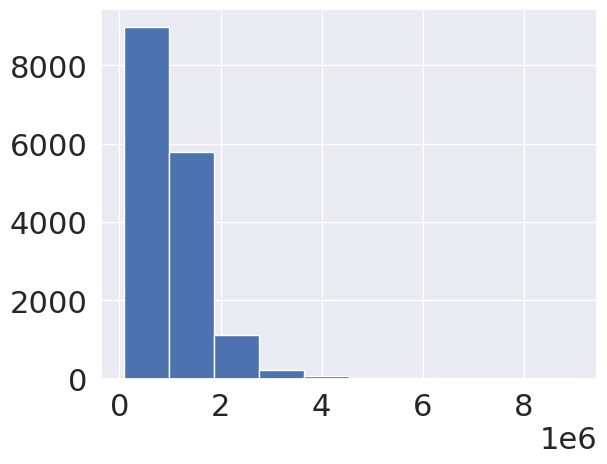

In [152]:
#Visualizing the histogram of price column
df_encoded.Price.hist();
normaltest(df_encoded.Price.values)

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed:

**Log <br>
Square root <br>
Box cox**

NormaltestResult(statistic=71.91911513363566, pvalue=2.415252704287913e-16)

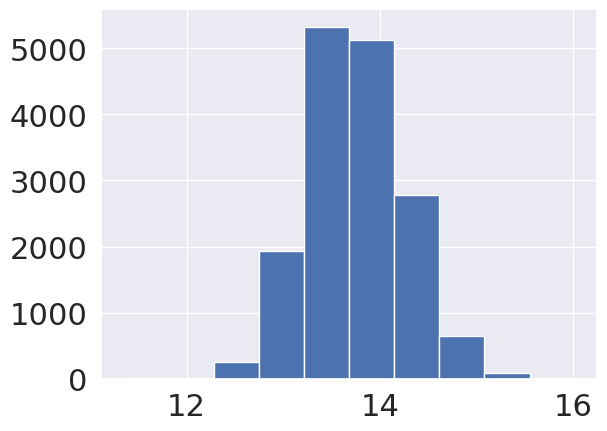

In [153]:
#log Transofrmation
log_transformed = np.log(df_encoded.Price)
log_transformed.hist()
normaltest(log_transformed)

NormaltestResult(statistic=2329.2527652786102, pvalue=0.0)

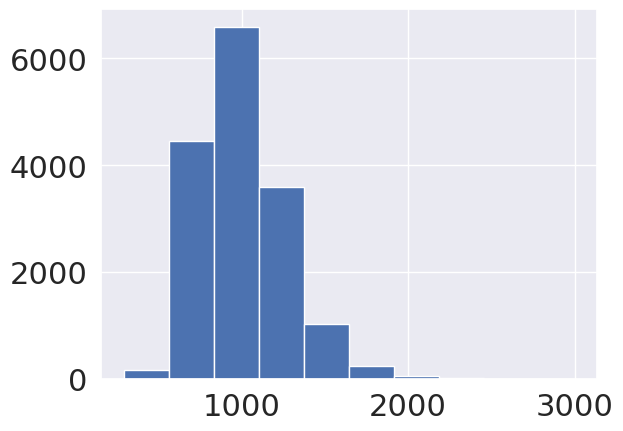

In [154]:
#square_root transoformation
sqrt_transformed = np.sqrt(df_encoded.Price)
sqrt_transformed.hist()
normaltest(sqrt_transformed)

Lambda choosen -0.11156881047891841
NormaltestResult(statistic=0.6329403011926914, pvalue=0.7287167629959574)


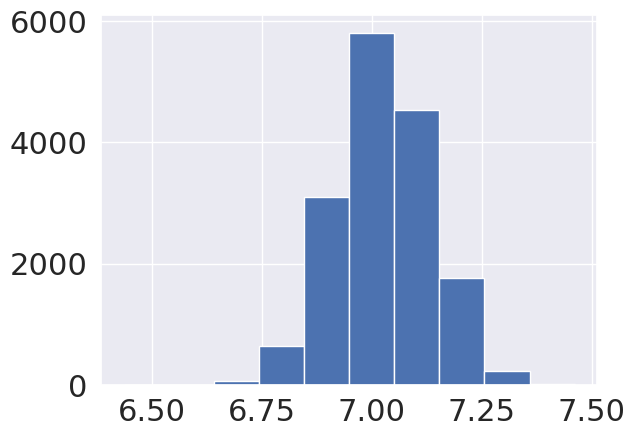

In [155]:
from scipy.stats import boxcox
boxcox_transformed = boxcox(df_encoded.Price)
boxcox_Price = boxcox_transformed[0]
lambda_value = boxcox_transformed[1]
print(f"Lambda choosen {lambda_value}")
plt.hist(boxcox_Price)
print(normaltest(boxcox_Price));

### Conclusion :
First of all, If we dive to the fact obtained from log transformation, the p value is pvalue=2.415252704287913e-16 which means there is 16 zero before 2.41 which is very tiny real number and directly rejects that it is normal distribution and thus it is too far from being normal distribution. Similaryly, in the case of square root transformation, the p-value is 0,so it also reject to be normally distributed.
The Higher the p-value is, the closer is distribution to the normal. Thus, the p value of boxcox transformation is approximately 0.73, which is far more than 0.05. Thus boxcox transformation provides a normally distributed y - value.

# Splitting the data

In [156]:
#Seperating training and testing data
X = df_encoded.drop(columns="Price")
y = boxcox_Price
X.shape, y.shape

((16170, 357), (16170,))

In [157]:
# Assert statement after dividing into X and y
assert X.shape[0] == y.shape[0], "The number of samples in X and y does not match."

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=72018)

In [159]:
X_train.isna().sum()

Method                                   0
Distance                                 0
Landsize                                 0
Latitude                                 0
Longitude                                0
                                        ..
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Regionname_Western Victoria              0
Length: 357, dtype: int64

# Model Evaluation

In [161]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

R^2 on training data  0.7438324723325859
R^2 on testing data  -1.2406034227904287e+23


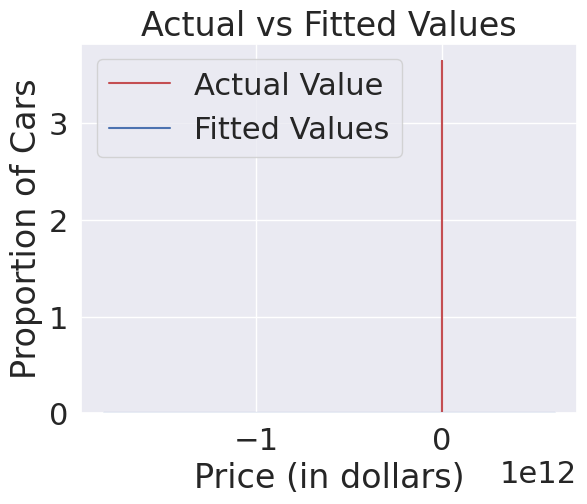

In [162]:
# making pipeline for standardscaler and linear regression
pipe = Pipeline([('ss', StandardScaler()),('lr',LinearRegression())])
pipe.fit(X_train,y_train)
print("R^2 on training data ",pipe.score(X_train,y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
plot_dis(y_test,predicted)

Negative R^2 in testing data shows the overfitting problem, we will be using different technique to overcome from it

In [163]:
s = StandardScaler()
lm = LinearRegression()
lm.fit(X_train, y_train)
predicted = lm.predict(X_test)
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.7442433365023485
R^2 on testing data  -10758477799.253014


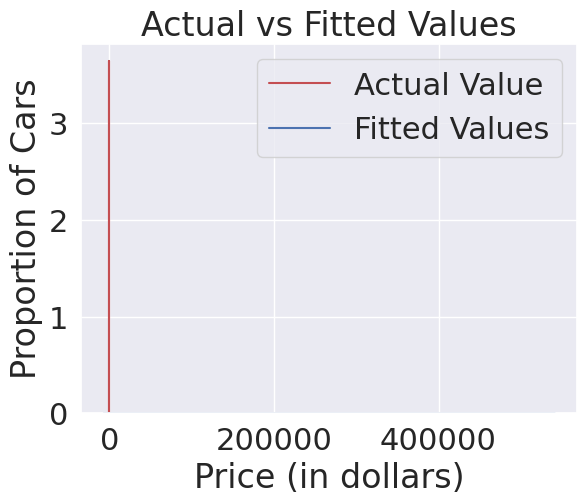

In [164]:
plot_dis(y_test,predicted)

### Ridge Regression

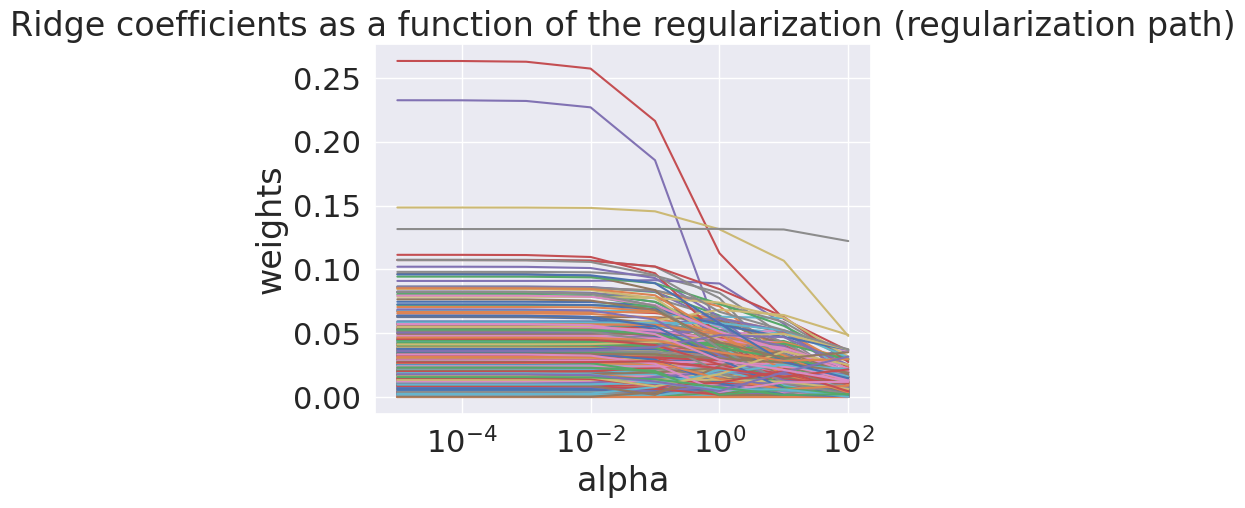

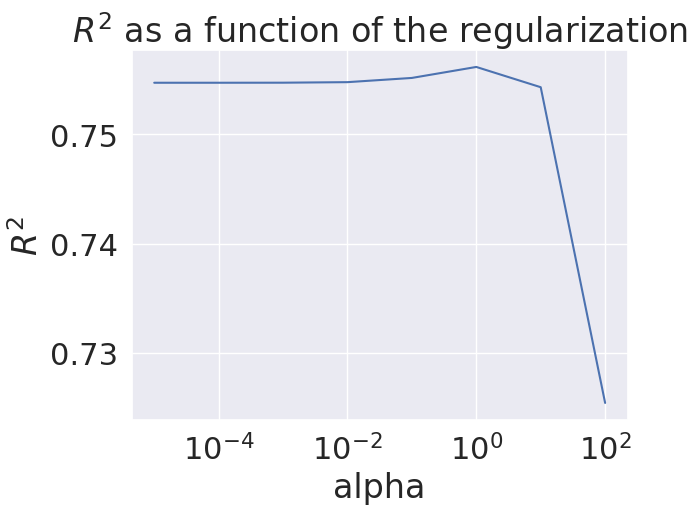

In [165]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
R_2=[]
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(abs(ridge.coef_))
    R_2.append(ridge.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()   

When alpha reaches to 1, we can see there is maximum R^2

In [198]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',MinMaxScaler() ), ('model',Ridge(alpha=1,tol=0.001))]
pipe = Pipeline(Input)

In [199]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', MinMaxScaler()), ('model', Ridge(alpha=1, tol=0.001))])

In [200]:
predicted=pipe.predict(X_test)

0.7854743458978557

In [201]:
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.802206565997587
R^2 on testing data  0.7854743458978557


### Lasso Regression

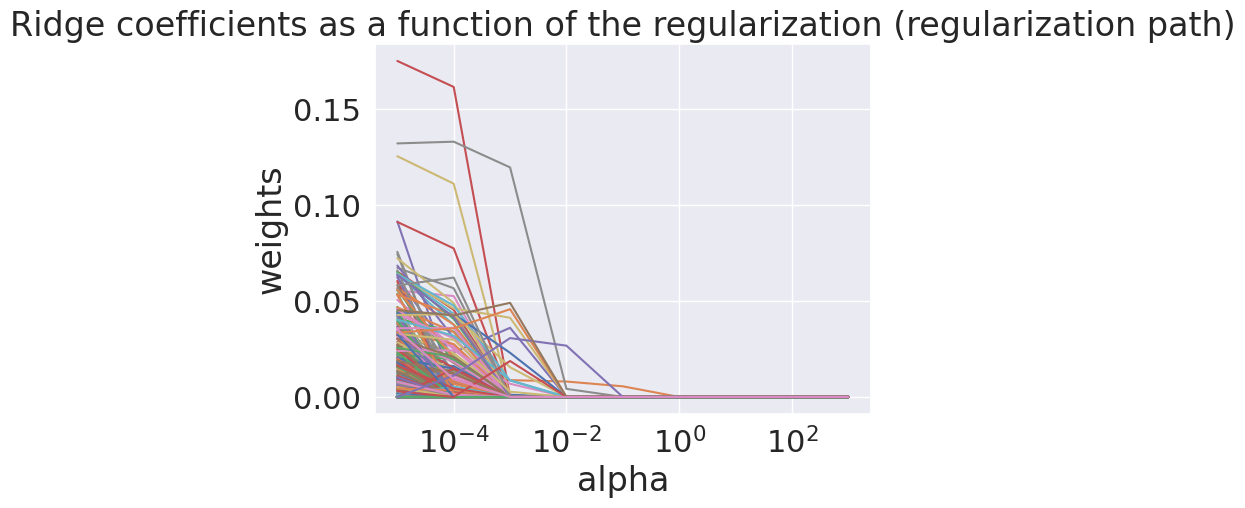

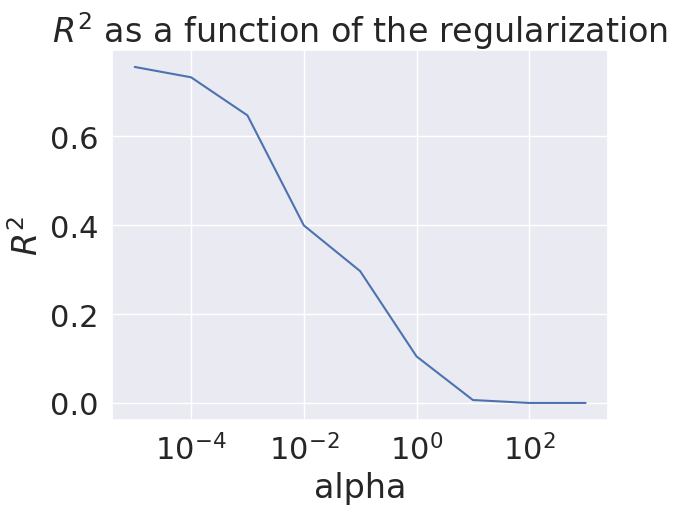

In [169]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2=[]
coefs = []
for alpha in alphas:
    la=Lasso(alpha=alpha)
    
    la.fit(X_train, y_train)
    coefs.append(abs(la.coef_))
    R_2.append(la.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()

In [194]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Lasso(alpha=0.0001,tol=0.001))]
pipe = Pipeline(Input)

In [195]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([7.17308205, 6.99976814, 6.92426469, ..., 7.04730386, 6.96761394,
       7.08782199])

In [196]:
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.7995408041898557
R^2 on testing data  0.7830577164770882


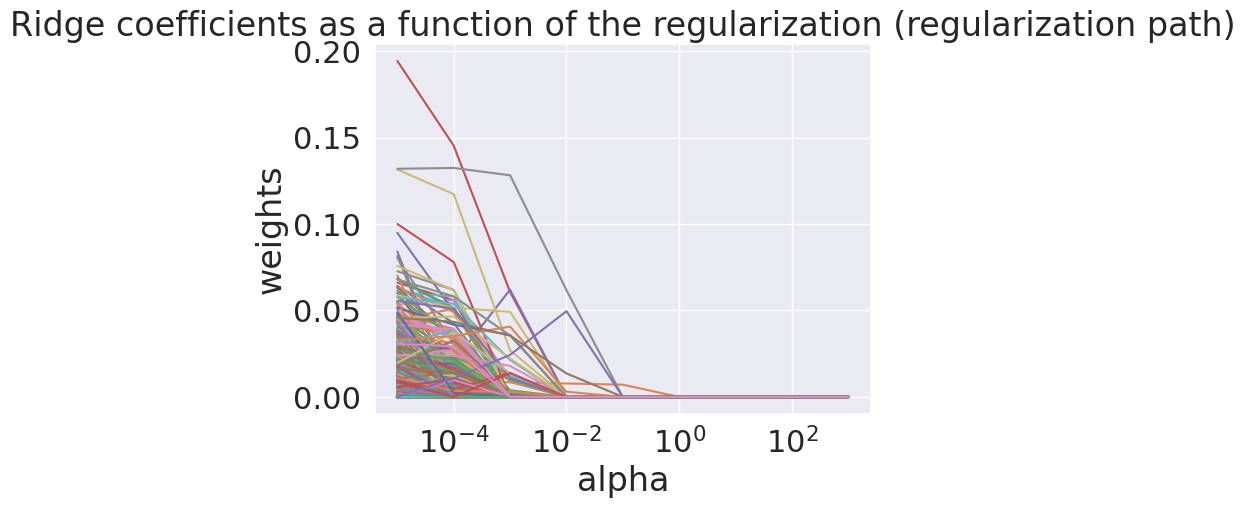

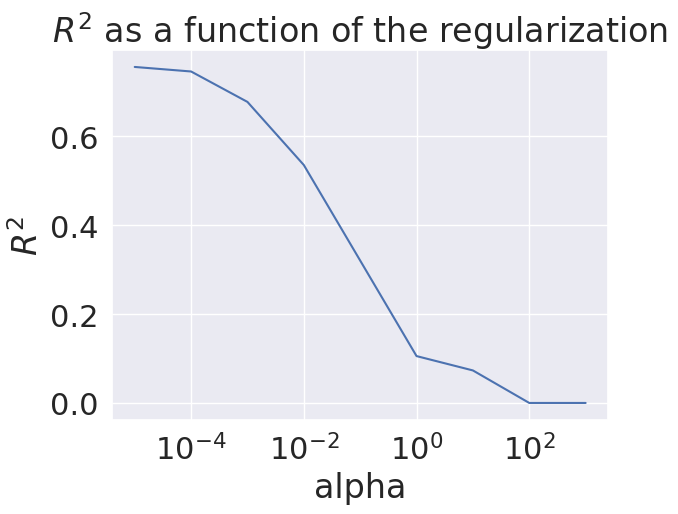

In [173]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2=[]
coefs = []
for alpha in alphas:
    et=ElasticNet(alpha=alpha)
    et.fit(X_train, y_train)
    coefs.append(abs(et.coef_))
    R_2.append(et.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("ElasticNet coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()

In [208]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',ElasticNet(alpha=0.0001,l1_ratio=0.6,tol=0.001))]
pipe = Pipeline(Input)

In [209]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([7.17285553, 6.99849625, 6.92305319, ..., 7.04652425, 6.96766108,
       7.08706158])

In [210]:
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.8015176949214504
R^2 on testing data  0.7807339170983394


# Conclusion
Above,we have tried to evaluate model using four method that is, Linear, Ridge, Lasso and ElasticNet. At first, we evaluated model using LinearRegression and what we found was the model did good at training however it badly failed and gave negative R^2 while testing due to overfitting. And then, we tried to use regularization to overcome overfitting. Before applying any regularization, we visualized what alpha values is giving maximum R^2 so that our model can give better prediction.The R^2 of Ridge regression is better than all other model during both training and testing, and it was far more better than the regression model that we used before. SImilarly,ElasticNet beats Lasso during training phase, but at the final model evaluation, Lasso seems little bit better than ElasticNet.

##### Some flaws
Unfortunately, because of computation issue, I was not able to test using GridSearchCV,and PolynomialFeatures degree>2. Also model has been affected due to huge missing value presented in our dataset, and almost half of the information became redundant. 